## Data Prep

In [499]:
import pandas as pd
import numpy as np

In [500]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915) 
  
# data (as pandas dataframes) 
X = differentiated_thyroid_cancer_recurrence.data.features 
y = differentiated_thyroid_cancer_recurrence.data.targets 
  
# metadata 
print(differentiated_thyroid_cancer_recurrence.metadata) 
  
# variable information 
print(differentiated_thyroid_cancer_recurrence.variables) 

{'uci_id': 915, 'name': 'Differentiated Thyroid Cancer Recurrence', 'repository_url': 'https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence', 'data_url': 'https://archive.ics.uci.edu/static/public/915/data.csv', 'abstract': 'This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 383, 'num_features': 16, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['Recurred'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2023, 'last_updated': 'Wed Mar 20 2024', 'dataset_doi': '10.24432/C5632J', 'creators': ['Shiva Borzooei', 'Aidin Tarokhian'], 'intro_paper': {'ID': 333, 'type': 'NA

In [501]:
# combine X and y into a single dataframe
df = pd.concat([X, y], axis=1)
df.head().T

,0,1,2,3,4
Age,27,34,30,62,62
Gender,F,F,F,F,F
Smoking,No,No,No,No,No
Hx Smoking,No,Yes,No,No,No
Hx Radiothreapy,No,No,No,No,No
Thyroid Function,Euthyroid,Euthyroid,Euthyroid,Euthyroid,Euthyroid
Physical Examination,Single nodular goiter-left,Multinodular goiter,Single nodular goiter-right,Single nodular goiter-right,Multinodular goiter
Adenopathy,No,No,No,No,No
Pathology,Micropapillary,Micropapillary,Micropapillary,Micropapillary,Micropapillary
Focality,Uni-Focal,Uni-Focal,Uni-Focal,Uni-Focal,Multi-Focal


In [502]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

df = df.rename(columns={'t': 'tumor', 'n': 'node', 'm': 'metastasis'})


strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [503]:
df.head().T

,0,1,2,3,4
age,27,34,30,62,62
gender,f,f,f,f,f
smoking,no,no,no,no,no
hx_smoking,no,yes,no,no,no
hx_radiothreapy,no,no,no,no,no
thyroid_function,euthyroid,euthyroid,euthyroid,euthyroid,euthyroid
physical_examination,single_nodular_goiter-left,multinodular_goiter,single_nodular_goiter-right,single_nodular_goiter-right,multinodular_goiter
adenopathy,no,no,no,no,no
pathology,micropapillary,micropapillary,micropapillary,micropapillary,micropapillary
focality,uni-focal,uni-focal,uni-focal,uni-focal,multi-focal


## EDA

In [504]:
df.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   383 non-null    int64 
 1   gender                383 non-null    object
 2   smoking               383 non-null    object
 3   hx_smoking            383 non-null    object
 4   hx_radiothreapy       383 non-null    object
 5   thyroid_function      383 non-null    object
 6   physical_examination  383 non-null    object
 7   adenopathy            383 non-null    object
 8   pathology             383 non-null    object
 9   focality              383 non-null    object
 10  risk                  383 non-null    object
 11  tumor                 383 non-null    object
 12  node                  383 non-null    object
 13  metastasis            383 non-null    object
 14  stage                 383 non-null    object
 15  response              383 non-null    ob

In [505]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:7])
    print(df[col].nunique())
    print()

age
[27 34 30 62 52 41 46]
65

gender
['f' 'm']
2

smoking
['no' 'yes']
2

hx_smoking
['no' 'yes']
2

hx_radiothreapy
['no' 'yes']
2

thyroid_function
['euthyroid' 'clinical_hyperthyroidism' 'clinical_hypothyroidism'
 'subclinical_hyperthyroidism' 'subclinical_hypothyroidism']
5

physical_examination
['single_nodular_goiter-left' 'multinodular_goiter'
 'single_nodular_goiter-right' 'normal' 'diffuse_goiter']
5

adenopathy
['no' 'right' 'extensive' 'left' 'bilateral' 'posterior']
6

pathology
['micropapillary' 'papillary' 'follicular' 'hurthel_cell']
4

focality
['uni-focal' 'multi-focal']
2

risk
['low' 'intermediate' 'high']
3

tumor
['t1a' 't1b' 't2' 't3a' 't3b' 't4a' 't4b']
7

node
['n0' 'n1b' 'n1a']
3

metastasis
['m0' 'm1']
2

stage
['i' 'ii' 'ivb' 'iii' 'iva']
5

response
['indeterminate' 'excellent' 'structural_incomplete'
 'biochemical_incomplete']
4

recurred
['no' 'yes']
2



In [506]:
df.describe(include='all').T #most have little description since they are categorical features

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,383.0,NaN,NaN,NaN,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0
gender,383,2,f,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoking,383,2,no,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hx_smoking,383,2,no,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hx_radiothreapy,383,2,no,376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thyroid_function,383,5,euthyroid,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
physical_examination,383,5,multinodular_goiter,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adenopathy,383,6,no,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathology,383,4,papillary,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
focality,383,2,uni-focal,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [507]:
df.columns

Index(['age', 'gender', 'smoking', 'hx_smoking', 'hx_radiothreapy',
       'thyroid_function', 'physical_examination', 'adenopathy', 'pathology',
       'focality', 'risk', 'tumor', 'node', 'metastasis', 'stage', 'response',
       'recurred'],
      dtype='object')

In [508]:
numerical = ['age']
categorical = ['gender', 'smoking', 'hx_smoking', 'hx_radiothreapy', 'thyroid_function', 'physical_examination', 'adenopathy',
                'pathology', 'focality', 'risk', 'tumor', 'node', 'metastasis', 'stage', 'response']

In [509]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Age distribution')

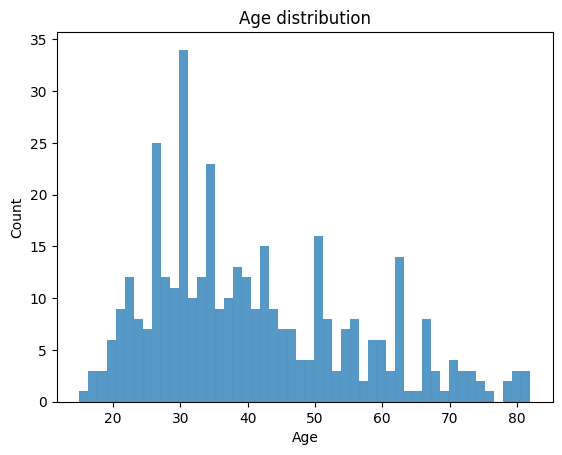

In [510]:
sns.histplot(data=df.age, bins=50, kde=False, linewidth=0.01)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')

Text(0.5, 1.0, 'Age distribution by recurrence status')

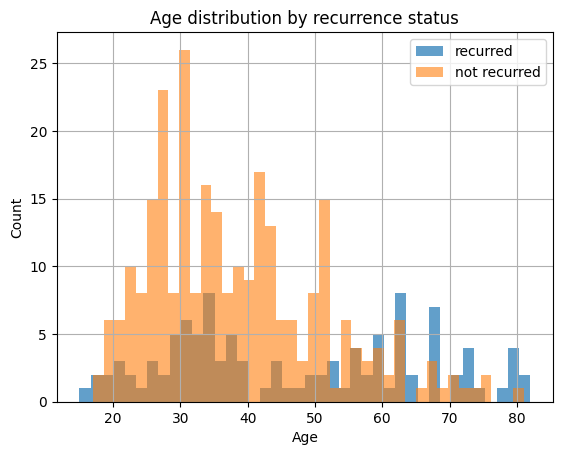

In [511]:
df[df.recurred=='yes'].age.hist(bins=40, alpha=0.7, label='recurred')
df[df.recurred=='no'].age.hist(bins=40, alpha=0.6, label='not recurred')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution by recurrence status')

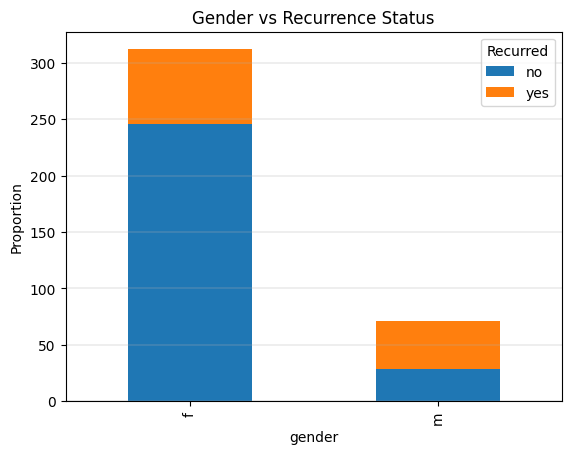

In [512]:
#gender to reccurrence crosstab
pd.crosstab(df.gender, df.recurred).plot(kind='bar', stacked=True)
plt.grid(True, axis='y', linewidth=0.3)
plt.ylabel('Proportion')
plt.title('Gender vs Recurrence Status')
plt.legend(title='Recurred')

#majority of the data is from female patients

In [513]:
df['recurred'] = df['recurred'].replace('yes', 1).replace('no', 0)
global_recurrence = df.recurred.mean()
print(f'Recurrence rate: {global_recurrence:.2%}')

Recurrence rate: 28.20%


/tmp/ipykernel_1834/2307331014.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['recurred'] = df['recurred'].replace('yes', 1).replace('no', 0)


In [514]:
recurred_female = df[df.gender == 'f'].recurred.mean()
recurred_male = df[df.gender == 'm'].recurred.mean()
print(f'Female recurrence rate: {recurred_female:.2%}')
print(f'Male recurrence rate: {recurred_male:.2%}')

#males are significantly more likely to have recurrence (significantly higher than global recurrence rate)

Female recurrence rate: 21.15%
Male recurrence rate: 59.15%


In [515]:
from IPython.display import display

for c in categorical:
    df_group = df.groupby(c).recurred.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_recurrence
    df_group['risk'] = df_group['mean'] / global_recurrence
    display(df_group)
    print()


,mean,count,diff,risk
gender,,,,
f,0.211538,312,-0.070446,0.750178
m,0.591549,71,0.309565,2.097809


,mean,count,diff,risk
smoking,,,,
no,0.224551,334,-0.057433,0.796324
yes,0.673469,49,0.391485,2.388322


,mean,count,diff,risk
hx_smoking,,,,
no,0.264789,355,-0.017196,0.939019
yes,0.500000,28,0.218016,1.773148


,mean,count,diff,risk
hx_radiothreapy,,,,
no,0.271277,376,-0.010708,0.962027
yes,0.857143,7,0.575159,3.039683


,mean,count,diff,risk
thyroid_function,,,,
clinical_hyperthyroidism,0.150000,20,-0.131984,0.531944
clinical_hypothyroidism,0.166667,12,-0.115318,0.591049
euthyroid,0.295181,332,0.013196,1.046798
subclinical_hyperthyroidism,0.000000,5,-0.281984,0.000000
subclinical_hypothyroidism,0.357143,14,0.075159,1.266534


,mean,count,diff,risk
physical_examination,,,,
diffuse_goiter,0.000000,7,-0.281984,0.000000
multinodular_goiter,0.371429,140,0.089444,1.317196
normal,0.285714,7,0.003730,1.013228
single_nodular_goiter-left,0.292135,89,0.010150,1.035997
single_nodular_goiter-right,0.200000,140,-0.081984,0.709259


,mean,count,diff,risk
adenopathy,,,,
bilateral,0.843750,32,0.561766,2.992187
extensive,1.000000,7,0.718016,3.546296
left,0.705882,17,0.423898,2.503268
no,0.108303,277,-0.173681,0.384075
posterior,1.000000,2,0.718016,3.546296
right,0.625000,48,0.343016,2.216435


,mean,count,diff,risk
pathology,,,,
follicular,0.428571,28,0.146587,1.519841
hurthel_cell,0.300000,20,0.018016,1.063889
micropapillary,0.000000,48,-0.281984,0.000000
papillary,0.313589,287,0.031605,1.112079


,mean,count,diff,risk
focality,,,,
multi-focal,0.514706,136,0.232722,1.825300
uni-focal,0.153846,247,-0.128138,0.545584


,mean,count,diff,risk
risk,,,,
high,1.000000,32,0.718016,3.546296
intermediate,0.627451,102,0.345467,2.225127
low,0.048193,249,-0.233792,0.170906


,mean,count,diff,risk
tumor,,,,
t1a,0.020408,49,-0.261576,0.072373
t1b,0.116279,43,-0.165705,0.412360
t2,0.132450,151,-0.149534,0.469708
t3a,0.427083,96,0.145099,1.514564
t3b,0.875000,16,0.593016,3.103009
t4a,0.950000,20,0.668016,3.368981
t4b,1.000000,8,0.718016,3.546296


,mean,count,diff,risk
node,,,,
n0,0.100746,268,-0.181238,0.357276
n1a,0.454545,22,0.172561,1.611953
n1b,0.763441,93,0.481457,2.707387


,mean,count,diff,risk
metastasis,,,,
m0,0.246575,365,-0.035409,0.874429
m1,1.000000,18,0.718016,3.546296


,mean,count,diff,risk
stage,,,,
i,0.195195,333,-0.086789,0.692220
ii,0.781250,32,0.499266,2.770544
iii,1.000000,4,0.718016,3.546296
iva,1.000000,3,0.718016,3.546296
ivb,1.000000,11,0.718016,3.546296


,mean,count,diff,risk
response,,,,
biochemical_incomplete,0.478261,23,0.196277,1.696055
excellent,0.004808,208,-0.277177,0.017050
indeterminate,0.114754,61,-0.167230,0.406952
structural_incomplete,0.978022,91,0.696038,3.468356


In [516]:
from sklearn.metrics import mutual_info_score

# rank relative importance by mutual information score
def mutual_info_recurrence_score(series):
    return mutual_info_score(series, df.recurred)

mi = df[categorical].apply(mutual_info_recurrence_score)
mi.sort_values(ascending=False)

# risk will be removed from the dataset since it is derived from other features (this is done following the original paper)

response                0.454855
risk                    0.293389
adenopathy              0.200770
node                    0.193780
tumor                   0.190385
stage                   0.121705
focality                0.071967
metastasis              0.062526
smoking                 0.049533
gender                  0.049113
pathology               0.046943
physical_examination    0.019453
hx_radiothreapy         0.013481
thyroid_function        0.008869
hx_smoking              0.008394
dtype: float64

In [517]:
df[numerical].corrwith(df.recurred) #not much correlation info, since only one numerical feature

age    0.258897
dtype: float64

In [518]:
df.describe()

,age,recurred
count,383.000000,383.000000
mean,40.866841,0.281984
std,15.134494,0.450554
min,15.000000,0.000000
25%,29.000000,0.000000
50%,37.000000,0.000000
75%,51.000000,1.000000
max,82.000000,1.000000


In [519]:
df[df.age > 37].recurred.mean(), df[df.age <= 37].recurred.mean()

(np.float64(0.3351063829787234), np.float64(0.23076923076923078))

In [520]:
df[df.age > 50].recurred.mean(), df[df.age <= 50].recurred.mean()
#older patients have higher recurrence rates

(np.float64(0.4803921568627451), np.float64(0.2099644128113879))

In [521]:
df[(df.age > 37) & (df.gender == 'm')].recurred.mean(), df[(df.age > 37) & (df.gender == 'm')].recurred.count()

(np.float64(0.6521739130434783), np.int64(46))

In [522]:
df[(df.age <= 37) & (df.gender == 'm')].recurred.mean(), df[(df.age <= 37) & (df.gender == 'm')].recurred.count()

(np.float64(0.48), np.int64(25))

In [523]:
df[(df.age > 37) & (df.gender == 'f')].recurred.mean(), df[(df.age > 37) & (df.gender == 'f')].recurred.count()

(np.float64(0.2323943661971831), np.int64(142))

In [524]:
df[(df.age <= 37) & (df.gender == 'f')].recurred.mean(), df[(df.age <= 37) & (df.gender == 'f')].recurred.count()

(np.float64(0.19411764705882353), np.int64(170))

## Validation Framework

Preparing data for training and validating different models

In [525]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [526]:
del df['risk'] #as mentioned earlier

In [527]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(306, 77)

In [528]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(229, 77, 77)

In [529]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [530]:
y_train = df_train.recurred.values
y_val = df_val.recurred.values
y_test = df_test.recurred.values
len(y_train), len(y_val), len(y_test)

(229, 77, 77)

In [531]:
del df_train['recurred']
del df_val['recurred']
del df_test['recurred']

In [532]:
categorical = ['gender',
 'smoking',
 'hx_smoking',
 'hx_radiothreapy',
 'thyroid_function',
 'physical_examination',
 'adenopathy',
 'pathology',
 'focality',
 'tumor',
 'node',
 'metastasis',
 'stage',
 'response']

In [533]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts[0]


{'gender': 'f',
 'smoking': 'no',
 'hx_smoking': 'no',
 'hx_radiothreapy': 'no',
 'thyroid_function': 'euthyroid',
 'physical_examination': 'multinodular_goiter',
 'adenopathy': 'no',
 'pathology': 'papillary',
 'focality': 'multi-focal',
 'tumor': 't1b',
 'node': 'n0',
 'metastasis': 'm0',
 'stage': 'i',
 'response': 'excellent',
 'age': 50}

In [534]:
dv = DictVectorizer(sparse=False)

In [535]:
X_train = dv.fit_transform(train_dicts)


In [536]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [537]:
test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)

## Models

I will train and tune three different models:
- Logistic regression
- Random forest classifier
- XGBoost

I can compare the performance based on metrics (f1, accuracy, ROC AUC)

### Metrics Calculation Functions

In [538]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

In [539]:
def show_metrics(model, model_name, X_val, y_val):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    roc_auc = roc_auc_score(y_val, y_proba)

    print(f"Metrics for {model_name}:")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_val, y_pred))

In [540]:
metrics_df = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'])

def metrics_to_df(model, model_name, X_val, y_val):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)

    metrics_dict = {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc_score': roc_auc
    }

    metrics_df.loc[len(metrics_df)] = metrics_dict

## Logistic Regression

In [541]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [542]:
show_metrics(lr, "Logistic Regression", X_val, y_val)

Metrics for Logistic Regression:
ROC AUC: 0.9728
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.79      0.88        19

    accuracy                           0.95        77
   macro avg       0.97      0.89      0.92        77
weighted avg       0.95      0.95      0.95        77

Confusion Matrix: 
 [[58  0]
 [ 4 15]]


In [543]:
metrics_to_df(lr, "Logistic Regression", X_val, y_val)

#### Parameter Tuning

This is a relatively small dataset, so cross-validation along with trying different values for C could be helpful.

In [544]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [545]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient = 'records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [546]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
C_vals = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
n_splits = 10

for C in C_vals:

    scores = []

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_tr = df_train.recurred.values
        y_v = df_val.recurred.values

        dv, model = train(df_train, y_tr, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_v, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
   
   
# C=0.5 0.986 +- 0.012


C=0.001 0.691 +- 0.139
C=0.01 0.921 +- 0.084
C=0.1 0.980 +- 0.021
C=0.5 0.986 +- 0.012
C=1 0.985 +- 0.015
C=5 0.979 +- 0.020
C=10 0.975 +- 0.026


Final LR Model on full train, then apply to test

In [547]:
df_full_train

,age,gender,smoking,hx_smoking,hx_radiothreapy,thyroid_function,physical_examination,adenopathy,pathology,focality,tumor,node,metastasis,stage,response,recurred
340,42,f,no,no,no,euthyroid,multinodular_goiter,no,papillary,multi-focal,t3b,n0,m0,i,indeterminate,0
161,22,f,no,no,no,euthyroid,single_nodular_goiter-right,no,papillary,uni-focal,t2,n0,m0,i,excellent,0
185,56,f,no,no,no,euthyroid,single_nodular_goiter-right,no,papillary,uni-focal,t2,n0,m0,i,excellent,0
275,31,m,no,no,no,euthyroid,single_nodular_goiter-right,no,papillary,uni-focal,t3a,n0,m0,i,indeterminate,0
286,58,f,no,no,no,clinical_hyperthyroidism,multinodular_goiter,no,follicular,multi-focal,t3a,n0,m0,ii,indeterminate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,33,m,no,no,no,euthyroid,single_nodular_goiter-right,no,papillary,uni-focal,t2,n1b,m0,i,excellent,0
255,37,f,no,no,no,euthyroid,single_nodular_goiter-right,no,papillary,multi-focal,t3a,n0,m0,i,excellent,0
72,31,f,no,no,no,euthyroid,single_nodular_goiter-right,no,papillary,uni-focal,t1b,n0,m0,i,excellent,0
235,60,f,no,no,no,euthyroid,single_nodular_goiter-right,right,papillary,multi-focal,t2,n1b,m0,ii,structural_incomplete,1


In [548]:
y_full_train = df_full_train.recurred.values

dv, lr = train(df_full_train[categorical + numerical], y_full_train, C=0.5)

In [549]:
show_metrics(lr, "Logistic Regression with C=0.5", X_test, y_test)

Metrics for Logistic Regression with C=0.5:
ROC AUC: 0.9950
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.97      0.98        29

    accuracy                           0.99        77
   macro avg       0.99      0.98      0.99        77
weighted avg       0.99      0.99      0.99        77

Confusion Matrix: 
 [[48  0]
 [ 1 28]]


In [550]:
metrics_to_df(lr, "Logistic Regression Tuned", X_test, y_test)

In [551]:
metrics_df

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Logistic Regression,0.948052,1.0,0.789474,0.882353,0.972777
1,Logistic Regression Tuned,0.987013,1.0,0.965517,0.982456,0.994971


## Random Forest Classifier

In [552]:
from sklearn.ensemble import RandomForestClassifier

In [553]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [554]:
y_pred = rf.predict(X_val)
y_proba = rf.predict_proba(X_val)[:, 1]

In [555]:
show_metrics(rf, "Random Forest", X_val, y_val)

Metrics for Random Forest:
ROC AUC: 0.9873
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.84      0.91        19

    accuracy                           0.96        77
   macro avg       0.98      0.92      0.94        77
weighted avg       0.96      0.96      0.96        77

Confusion Matrix: 
 [[58  0]
 [ 3 16]]


In [556]:
metrics_to_df(rf, "Random Forest", X_val, y_val)

In [557]:
metrics_df

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Logistic Regression,0.948052,1.0,0.789474,0.882353,0.972777
1,Logistic Regression Tuned,0.987013,1.0,0.965517,0.982456,0.994971
2,Random Forest,0.961039,1.0,0.842105,0.914286,0.987296


#### Tuning Random Forest Classifier

In [558]:
scores = []

for n in range(5, 201, 10):
    #print(n)
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

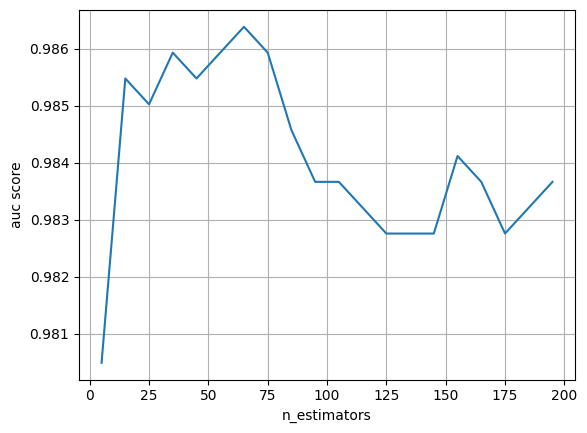

In [559]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('n_estimators')
plt.ylabel('auc score')
plt.grid(True)

#Performs well quickly and stays performing well (miniscule differences in performance). 
# Probably no need to go beyond 50 estimators.

In [560]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))


In [561]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

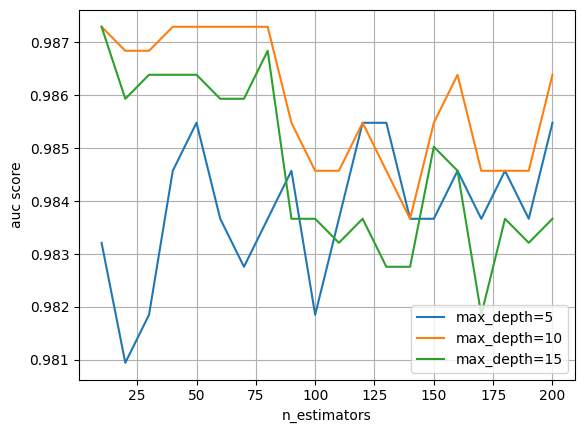

In [562]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
    plt.grid(True)

plt.xlabel('n_estimators')
plt.ylabel('auc score')
plt.legend()

# max_depth of 10 seems to perform best overall

In [563]:
max_depth = 10

In [564]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [565]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

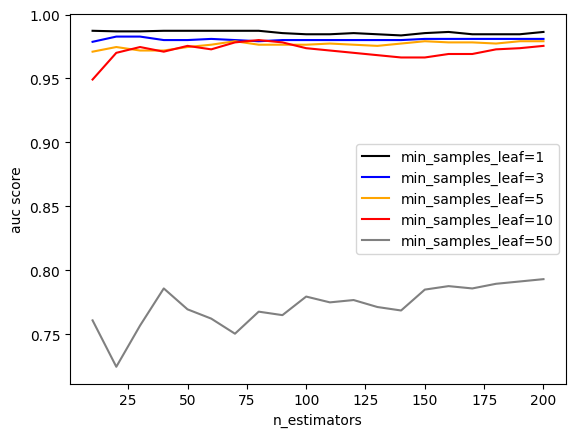

In [566]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.xlabel('n_estimators')
plt.ylabel('auc score')
plt.legend()

In [567]:
min_samples_leaf = 3

n_estimators = 50

In [568]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
    model.fit(X_train, y_train)
    
    return dv, model

y_full_train = df_full_train.recurred.values

dv, rf = train(df_full_train, y_full_train)

In [569]:
show_metrics(rf, "Random Forest Tuned", X_test, y_test)

Metrics for Random Forest Tuned:
ROC AUC: 0.9957
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.90      0.95        29

    accuracy                           0.96        77
   macro avg       0.97      0.95      0.96        77
weighted avg       0.96      0.96      0.96        77

Confusion Matrix: 
 [[48  0]
 [ 3 26]]


In [570]:
metrics_to_df(rf, "Random Forest Tuned", X_test, y_test)

In [571]:
metrics_df

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Logistic Regression,0.948052,1.0,0.789474,0.882353,0.972777
1,Logistic Regression Tuned,0.987013,1.0,0.965517,0.982456,0.994971
2,Random Forest,0.961039,1.0,0.842105,0.914286,0.987296
3,Random Forest Tuned,0.961039,1.0,0.896552,0.945455,0.995690


## XGBoost

In [572]:
import xgboost as xgb

In [573]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [574]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [575]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [576]:
s = output.stdout

In [577]:
print(s[:200])

[0]	train-auc:0.97761	val-auc:0.96234
[5]	train-auc:0.98240	val-auc:0.96325
[10]	train-auc:0.98240	val-auc:0.96325
[15]	train-auc:0.98964	val-auc:0.98094
[20]	train-auc:0.99122	val-auc:0.98094
[25]	tr


In [578]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

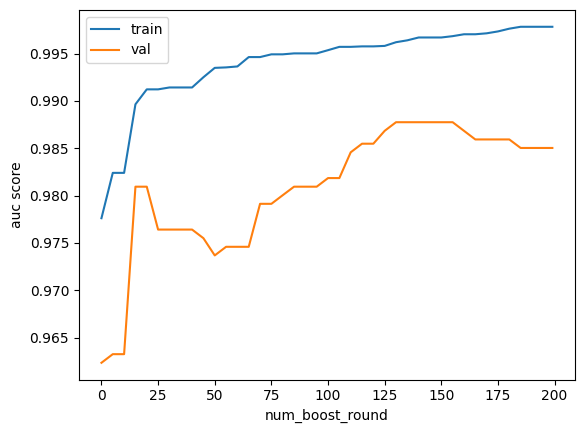

In [359]:
df_score = parse_xgb_output(output)

plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.xlabel('num_boost_round')
plt.ylabel('auc score')
plt.legend()

#looks good around 125, then starts overfitting

### XGBoost Parameter Tuning

- Tuning eta

In [360]:
scores = {}

In [369]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [370]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [371]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

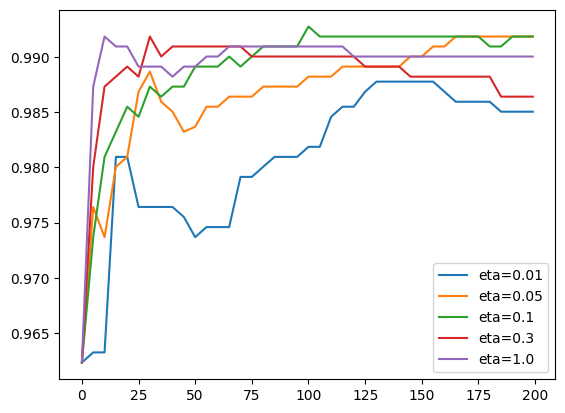

In [372]:
etas = ['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0']

for eta in etas:
    df_scores = scores[eta]
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=eta)
plt.legend()

#0.1 looks like sweet spot. Reaches peak around 100 and doesn't fall off dramatically

In [373]:
eta = 0.1

- Tuning max_depth parameter

In [374]:
scores = {}

In [381]:
%%capture output

xgb_params = {
    'eta': eta, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [382]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [383]:
scores.keys()
#['max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10']

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10'])

(0.97, 1.0)

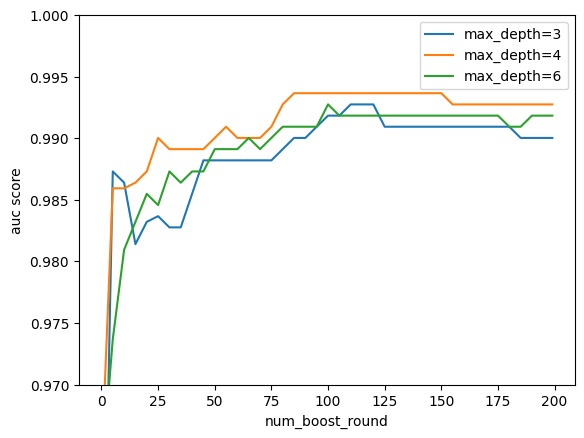

In [384]:
del scores['max_depth=10']

for max_depth, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=max_depth)
plt.legend()
plt.xlabel('num_boost_round')
plt.ylabel('auc score')
plt.ylim(0.97, 1.0)


In [385]:
max_depth = 6

- Tuning min_child_weight

In [386]:
scores = {}

In [393]:
%%capture output

xgb_params = {
    'eta': eta, 
    'max_depth': max_depth,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [394]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [395]:
scores.keys()
#['min_child_weight=1', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=30']

dict_keys(['min_child_weight=1', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=30'])

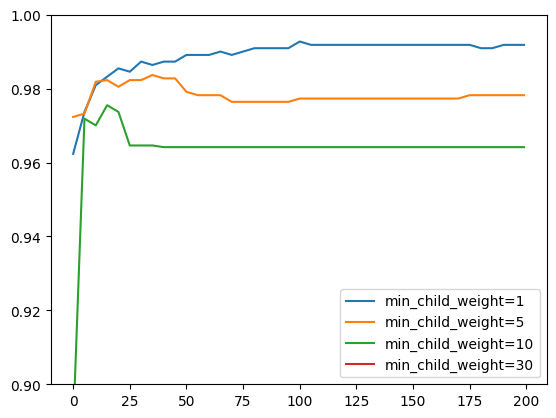

In [396]:
for min_child_weight, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=min_child_weight)
plt.ylim(0.9, 1.0)
plt.legend()

In [397]:
min_child_weight = 1

In [579]:
xgb_params = {
    'eta': eta, 
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [580]:
#training on full training set

def train_xgb(df_train, y_train, y_test=y_test, xgb_params=xgb_params, num_boost_round=175):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    test_dicts = df_test[categorical + numerical].to_dict(orient='records')
    X_test = dv.transform(test_dicts)

    features = list(dv.get_feature_names_out())
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
    dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

    xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round)
    
    return dv, dtest, xgb_model

y_full_train = df_full_train.recurred.values

dv, dtest, xgboost = train_xgb(df_full_train, y_full_train)

In [581]:
def show_metrics_xgb(model, model_name, dtest, y_test):
    y_proba = model.predict(dtest)
    y_pred = [1 if p >= 0.5 else 0 for p in y_proba]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"Metrics for {model_name}:")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

In [582]:
show_metrics_xgb(xgboost, "XGBoost", dtest, y_test)

Metrics for XGBoost:
ROC AUC: 0.9957
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        29

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77

Confusion Matrix: 
 [[47  1]
 [ 1 28]]


In [583]:
def metrics_to_df_xgb(model, model_name, dtest, y_test):
    y_proba = model.predict(dtest)
    y_pred = [1 if p >= 0.5 else 0 for p in y_proba]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    metrics_dict = {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc_score': roc_auc
    }

    metrics_df.loc[len(metrics_df)] = metrics_dict

In [584]:
metrics_to_df_xgb(xgboost, "XGBoost Tuned", dtest, y_test)

In [585]:
metrics_df

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Logistic Regression,0.948052,1.000000,0.789474,0.882353,0.972777
1,Logistic Regression Tuned,0.987013,1.000000,0.965517,0.982456,0.994971
2,Random Forest,0.961039,1.000000,0.842105,0.914286,0.987296
3,Random Forest Tuned,0.961039,1.000000,0.896552,0.945455,0.995690
4,XGBoost Tuned,0.974026,0.965517,0.965517,0.965517,0.995690


In [586]:
metrics_df = metrics_df.drop(index=[0, 2]).reset_index(drop=True)


In [587]:
metrics_df['model'] = metrics_df['model'].str.replace(' Tuned', '', regex=False)
metrics_df

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Logistic Regression,0.987013,1.000000,0.965517,0.982456,0.994971
1,Random Forest,0.961039,1.000000,0.896552,0.945455,0.995690
2,XGBoost,0.974026,0.965517,0.965517,0.965517,0.995690


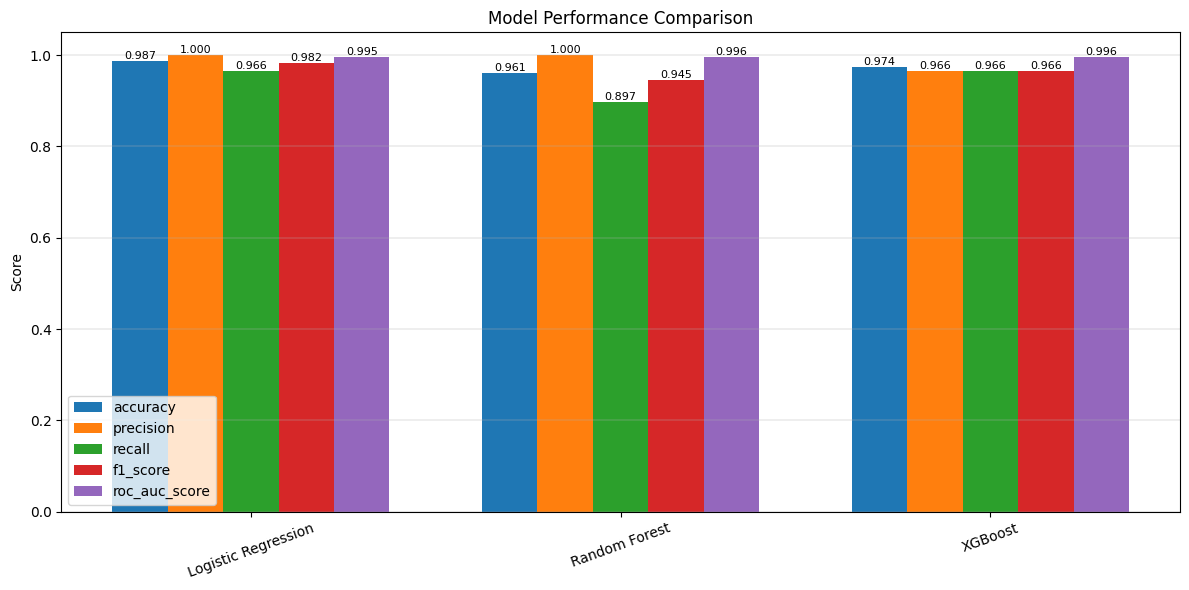

In [588]:
def model_comparison(metrics_df):
    models = metrics_df['model'].tolist()
    metrics = metrics_df.columns[1:]  # numeric metric columns

    plt.figure(figsize=(12, 6))

    x = np.arange(len(models))
    width = 0.15

    # Plot each metric’s bars
    for i, metric in enumerate(metrics):
        values = metrics_df[metric].values
        bars = plt.bar(x + i * width, values, width, label=metric)

        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:.3f}",
                ha='center', va='bottom', fontsize=8
            )

    plt.xticks(x + width * (len(metrics)-1) / 2, models, rotation=20)
    plt.ylabel("Score")
    plt.title("Model Performance Comparison")
    plt.legend()
    plt.tight_layout()
    plt.grid(True, axis='y', linewidth=0.3)
    plt.show()

model_comparison(metrics_df)

- XGBoost is the most consistent model across all metrics, so this one will be used.